<a href="https://colab.research.google.com/github/SeffiCohen/FairTTA/blob/main/Fairtta_benchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# choose dataset

#DATASET_NAME = 'COMPAS_SEX'
#DATASET_NAME = 'ADULT_SEX'
DATASET_NAME = 'CREDIT_SEX'
#DATASET_NAME = 'RECRUIT_SEX'

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown widget with dataset options
dataset_dropdown = widgets.Dropdown(
    options=[ 'RECRUIT_SEX','ADULT_SEX','COMPAS_SEX',  'CREDIT_SEX'],
    description='Dataset:',
    disabled=False,
)

# Display the widget
display(dataset_dropdown)


Dropdown(description='Dataset:', options=('RECRUIT_SEX', 'ADULT_SEX', 'COMPAS_SEX', 'CREDIT_SEX'), value='RECR…

In [ ]:
DATASET_NAME = dataset_dropdown.value
print(f"Selected dataset: {DATASET_NAME}")


Selected dataset: RECRUIT_SEX


In [ ]:
# upload kaggle.json file using user prompt
from google.colab import files
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
data = pd.read_csv(fn)

Saving recruitmentdataset-2022-1.3.csv to recruitmentdataset-2022-1.3 (1).csv
User uploaded file "recruitmentdataset-2022-1.3 (1).csv" with length 315287 bytes


In [ ]:
data.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


In [ ]:

NFOLDS = 5
EXP = 'RF'
#EXP = 'XGB'
#EXP = 'LG'
#EXP = 'NN'


In [ ]:
# Create a dropdown widget with model options
model_dropdown = widgets.Dropdown(
    options=[ 'LG', 'NN','RF', 'XGB'],
    description='model:',
    disabled=False,
)

# Display the widget
display(model_dropdown)


Dropdown(description='model:', options=('LG', 'NN', 'RF', 'XGB'), value='LG')

In [ ]:
EXP = model_dropdown.value
print(f"Selected model: {EXP}")

Selected model: LG


In [ ]:
import scipy as sp


In [ ]:

!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import math
import gc

from lightgbm import LGBMClassifier
import lightgbm as lgb
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix

from sklearn.feature_selection import VarianceThreshold
warnings.simplefilter(action='ignore', category=FutureWarning)

from fairlearn.postprocessing import ThresholdOptimizer

from datetime import datetime

from sklearn.metrics import confusion_matrix
import graphviz

from sklearn.tree import export_graphviz

from datetime import date

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
if DATASET_NAME == 'ADULT_SEX':
    TARGET_COL = 'income'
    PRIV_FEATURE = "sex"
    PRIV_CLASS = 1
    # in this dataset the target = 0 is unfavorable.
    UNFAVOUR_GROUP = 1
    #data = pd.read_csv('Data/adult-census-income/adult.csv')
    data[TARGET_COL] = data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    data['sex'] = np.where(data['sex'] == 'Male', 0,1)
    data['white'] = np.where(data['race'] == 'White', 1,0)


    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'white']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']
    #N_AUG = 3


elif DATASET_NAME == 'CREDIT_SEX':
    #data = pd.read_csv('../input/german-credit-data-with-risk/german_credit_data.csv')
    TARGET_COL = 'Risk'
    PRIV_FEATURE = 'Sex'
    PRIV_CLASS = 1
    # in this dataset the target = 1 is unfavorable.
    UNFAVOUR_GROUP = 0
    data[TARGET_COL] = data[TARGET_COL].apply(lambda x: 0 if x == 'bad' else 1)
    data['Sex'] = np.where(data['Sex'] == 'male', 0,1)
    data = data.drop(["Unnamed: 0"],axis=1)
    data['young'] = data['Age'].apply(lambda x: 0 if x < 25 else 1)
    CATEGORICAL = ['Housing', 'Saving accounts' , 'Checking account', 'Purpose']
    feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']
    #N_AUG = 2

elif DATASET_NAME == 'RECRUIT_SEX':
    #data = pd.read_csv('Data/utrecht-fairness-recruitment-dataset/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'gender'
    PRIV_CLASS = 0
    # in this dataset the target = 0 is unfavorable.
    UNFAVOUR_GROUP = 1
    data['gender'] = np.where(data['gender'] == 'male', 0,1)
    data['decision'] = np.where(data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME =='COMPAS_SEX':
    #data = pd.read_csv('Data/compastwoyears/compas-scores-two-years_v1.csv')
    TARGET_COL = 'two_year_recid'
    data['sex'] = np.where(data['sex'] == 'Male', 0,1)
    PRIV_FEATURE = 'sex'
    PRIV_CLASS = 1
    # in this dataset the target = 1 is unfavorable.
    UNFAVOUR_GROUP = 1
    feature_columns = ['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree' , 'score_text', 'v_score_text']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text', 'v_score_text']

### prepare datasets

In [ ]:
print(data.shape)
display(data.columns)
data.head(20)

(4000, 15)


Index(['Id', 'gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company', 'decision'],
      dtype='object')

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,1,24,German,Swimming,70,False,False,False,False,1,True,phd,A,1
1,x6077a,0,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,0
2,x6006e,1,23,Dutch,Running,67,False,True,True,False,0,True,master,A,0
3,x2173b,0,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,1
4,x6241a,1,26,German,Golf,59,False,False,False,False,1,False,master,A,1
5,x9063d,1,26,Dutch,Chess,63,False,False,False,False,1,True,bachelor,A,1
6,x5785d,1,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,0
7,x8767c,1,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,1
8,x6541b,1,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,0
9,x3890b,0,24,Dutch,Football,55,True,False,False,True,3,False,master,A,1


In [ ]:
data[feature_columns].isnull().sum()

gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
dtype: int64

In [ ]:
data.dropna(subset = feature_columns, inplace = True, axis=0)

In [ ]:
data[feature_columns].head(10)

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company
0,1,24,German,Swimming,70,False,False,False,False,1,True,phd,A
1,0,26,German,Golf,67,False,True,False,False,2,True,bachelor,A
2,1,23,Dutch,Running,67,False,True,True,False,0,True,master,A
3,0,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A
4,1,26,German,Golf,59,False,False,False,False,1,False,master,A
5,1,26,Dutch,Chess,63,False,False,False,False,1,True,bachelor,A
6,1,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A
7,1,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A
8,1,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A
9,0,24,Dutch,Football,55,True,False,False,True,3,False,master,A


In [ ]:
data[TARGET_COL].describe()

count    4000.000000
mean        0.316750
std         0.465267
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: decision, dtype: float64

In [ ]:
data[PRIV_FEATURE].describe()

count    4000.000000
mean        0.468250
std         0.499053
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [ ]:
data[PRIV_FEATURE].value_counts()

gender
0    2127
1    1873
Name: count, dtype: int64

In [ ]:
data.groupby([PRIV_FEATURE,TARGET_COL]).count()

Id   age  nationality  sport  ind-university_grade  \
gender decision                                                         
0      0         1377  1377         1377   1377                  1377   
       1          750   750          750    750                   750   
1      0         1356  1356         1356   1356                  1356   
       1          517   517          517    517                   517   

                 ind-debateclub  ind-programming_exp  ind-international_exp  \
gender decision                                                               
0      0                   1377                 1377                   1377   
       1                    750                  750                    750   
1      0                   1356                 1356                   1356   
       1                    517                  517                    517   

                 ind-entrepeneur_exp  ind-languages  ind-exact_study  \
gender decision                                                        
0      0                        1377           1377             1377   
       1                         750            750              750   
1      0                        1356           1356             1356   
       1                         517            517              517   

                 ind-degree  company  
gender decision                       
0      0               1377     1377  
       1                750      750  
1      0               1356     1356  
       1                517      517

# PreProcessing

In [ ]:
# Feature Selection

#dataset for adverserial validaiton of the privileged feature
priv_feature_columns = feature_columns.copy()
#priv_feature_columns.append(TARGET_COL)
priv_feature_columns.remove(PRIV_FEATURE)

priv_data = data[priv_feature_columns].copy()
priv_y = data[PRIV_FEATURE].copy()

# dataset for training
y = data[TARGET_COL]
data = data[feature_columns]

import category_encoders as ce
encoder = ce.TargetEncoder(cols=CATEGORICAL)

encoder.fit(data, y)
data = encoder.transform(data)



encoder1 = ce.TargetEncoder(cols=CATEGORICAL)
encoder1.fit(priv_data, priv_y)
priv_data = encoder1.transform(priv_data)



In [ ]:
#Create train and validation set
train_x, valid_x, train_y, valid_y = train_test_split(data, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [ ]:
print ("Shape of training input : ",train_x.shape)
print ("Shape of training output : ",train_y.shape)

Shape of training input :  (2800, 13)
Shape of training output :  (2800,)


In [ ]:
def print_metrics(y_gt, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
    print('conf matrix:\n ', confusion_matrix(y_gt, y_pred) ,
          '\naccuracy: ', (tp+tn)/(tp+tn+fn+fp),
          'precision: ', tp/(tp+fp),
          'recall: ', tp/(tp+fn),
          'fpr: ', fp/(fp+tn),
          'tpr: ', tp /(tp + fn),
          'fn+fp', fn+fp)
    #returm fpr, tpr, accuracy
    return fp/(fp+tn), tp /(tp + fn), (tp+tn)/(tp+tn+fn+fp)

In [ ]:
# bias metric - equal opportunity difference
def opportunity_diff_tpr(tpr1, tpr2):
    return abs(tpr1-tpr2)

In [ ]:
# bias metric - equal opportunity difference
def opportunity_diff_fpr(fpr1, fpr2):
    return abs(fpr1-fpr2)

In [ ]:
# bias metric - avarage absolute odds difference
def odds_diff(tpr1, tpr2, fpr1, fpr2):
    return 0.5*(abs(tpr2-tpr1) + abs(fpr2-fpr1))

In [ ]:
# bias metric - statistical parity difference
def parity_diff(y_pred_0, y_pred_1):
    if PRIV_CLASS ==1:
        return len(y_pred_0)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_1)/(len(y_pred_1)+len(y_pred_0))
    else:
        return len(y_pred_1)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_0)/(len(y_pred_1)+len(y_pred_0))

In [ ]:
# bias metric - Disparate impact
def disparate_impact(y_pred_0, y_pred_1):
    if PRIV_CLASS == 1:
        return (len(y_pred_0)/len(y_pred_0+y_pred_1)) / (len(y_pred_1)/len(y_pred_1+len(y_pred_0)))
    else:
        return (len(y_pred_1)/len(y_pred_0+y_pred_1)) / (len(y_pred_0)/len(y_pred_1+len(y_pred_0)))


In [ ]:
# calculate the bias of divided dataset by the privileged feature
def calc_bias(data,y, priv_feature,y_pred, experiment_text):
    data_full =  pd.concat([data, y], axis=1)
    data_full['y_pred'] = y_pred

    label = TARGET_COL
    print('performance for whole ds:'+ experiment_text)
    fpr, tpr, acc = print_metrics(data_full[TARGET_COL], data_full['y_pred'] )

    feature_cat_list = list(data[priv_feature].unique())
    #print(feature_cat_list)
    valid_cat0 = data_full[data_full[priv_feature]==feature_cat_list[0]]
    valid_cat1 = data_full[data_full[priv_feature]==feature_cat_list[1]]
    print('performance for 0 sub-group:')
    fpr_0, tpr_0 , acc_0 = print_metrics(valid_cat0[TARGET_COL], valid_cat0['y_pred'])
    print('performance for 1 sub-group:')

    fpr_1, tpr_1, acc_1 = print_metrics(valid_cat1[TARGET_COL], valid_cat1['y_pred'])
    op_diff = opportunity_diff_tpr(tpr_0, tpr_1)
    op_diff_fpr = opportunity_diff_fpr(fpr_0, fpr_1)
    od_diff = odds_diff(tpr_0, tpr_1, fpr_0, fpr_1)
    print('bias metrics:')
    #print('equal opportunity for tpr: (close to 0)', op_diff)
    #print('equal opportunity for fpr: (close to 0)', op_diff_fpr)
    print('avarage absolute odds difference: (close to 0)',od_diff)
    #print('statistical parity difference: (close to 0) ', parity_diff(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1]))
    #print('disparate_impact: (close to 1) ', disparate_impact(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1]) )



    return (op_diff,op_diff_fpr, od_diff, acc,fpr_0, tpr_0, fpr_1, tpr_1 )


# Modeling

## General baseline model

In [ ]:

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs, acc = [], []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

performance for whole ds:subexperiment - baseline wo/TTA model:0
conf matrix:
  [[495  51]
 [156  98]] 
accuracy:  0.74125 precision:  0.6577181208053692 recall:  0.3858267716535433 fpr:  0.09340659340659341 tpr:  0.3858267716535433 fn+fp 207
performance for 0 sub-group:
conf matrix:
  [[222  32]
 [ 81  70]] 
accuracy:  0.7209876543209877 precision:  0.6862745098039216 recall:  0.46357615894039733 fpr:  0.12598425196850394 tpr:  0.46357615894039733 fn+fp 113
performance for 1 sub-group:
conf matrix:
  [[273  19]
 [ 75  28]] 
accuracy:  0.7620253164556962 precision:  0.5957446808510638 recall:  0.27184466019417475 fpr:  0.06506849315068493 tpr:  0.27184466019417475 fn+fp 94
bias metrics:
avarage absolute odds difference: (close to 0) 0.1263236287820208
performance for whole ds:subexperiment - baseline wo/TTA model:1
conf matrix:
  [[490  56]
 [154 100]] 
accuracy:  0.7375 precision:  0.6410256410256411 recall:  0.3937007874015748 fpr:  0.10256410256410256 tpr:  0.3937007874015748 fn+fp 

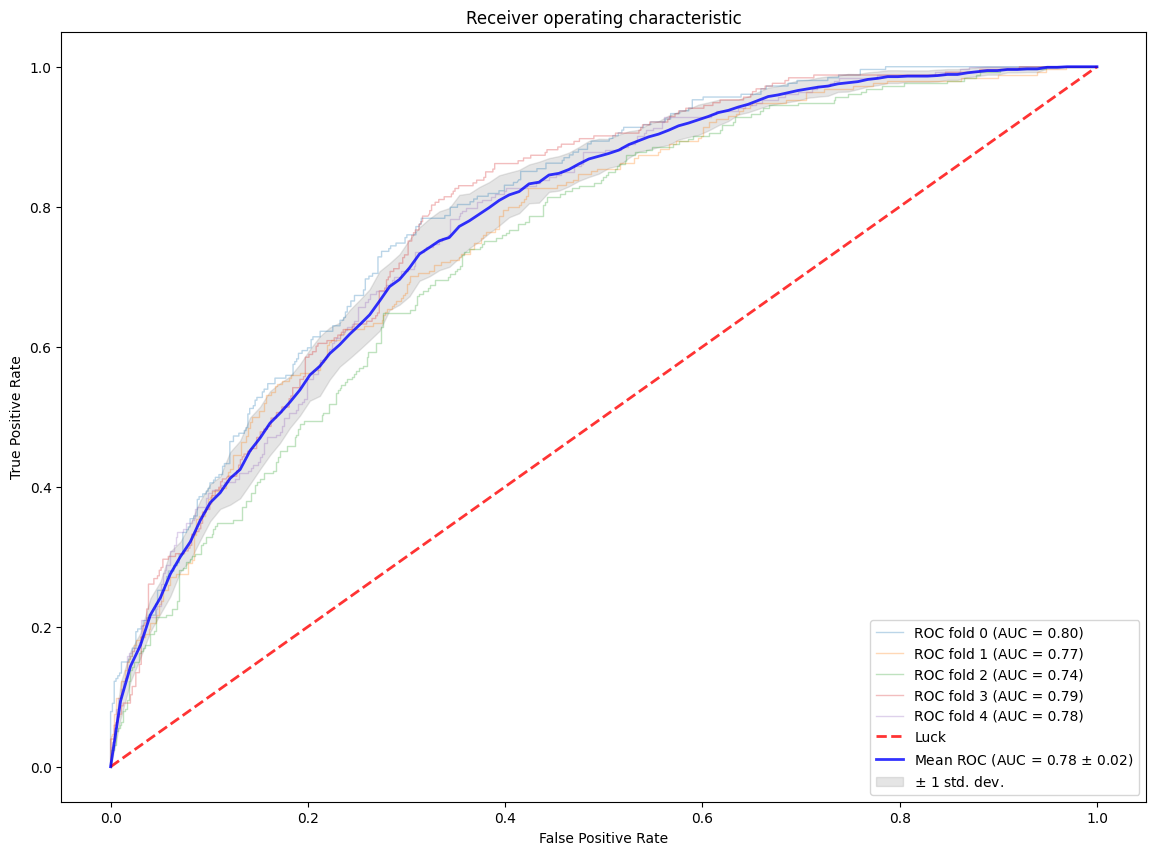

,AUC Train,AUC Test
0,0.774861,0.797111
1,0.778226,0.766130
2,0.782514,0.743697
3,0.775424,0.790405
4,0.777631,0.778396


In [ ]:
cv = StratifiedKFold(n_splits=NFOLDS, random_state=1234, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])

if EXP =='RF':
    clf = RandomForestClassifier(random_state=0, min_samples_leaf = 7)#max_depth=50, , min_samples_leaf = 7
elif EXP == 'XGB':
    clf = XGBClassifier(max_depth=5, n_estimators=40, subsample=0.9, learning_rate=0.1, random_state = 142)
elif EXP == 'NN':
    clf = MLPClassifier(hidden_layer_sizes = 157, solver = 'adam', learning_rate = 'adaptive', random_state = 142)

else:
    clf = LogisticRegression(random_state = 142, n_jobs = -1)

fprs, tprs, scores, op,op_f,  od , acc , fpr_0, tpr_0, fpr_1, tpr_1 = [], [], [], [],[], [], [], [], [], [], []

start_time = datetime.now()
for (train, test), i in zip(cv.split(data, y), range(5)):
    clf.fit(data.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred = clf.predict(data.iloc[test])
    o_p, o_p_fpr, o_d , acc_ , fpr_0_, tpr_0_, fpr_1_, tpr_1_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline wo/TTA'+' model:'+str(i))
    acc.append(acc_)
    op.append(o_p)
    op_f.append(o_p_fpr)
    od.append(o_d)
    fpr_0.append(fpr_0_)
    tpr_0.append(tpr_0_)
    fpr_1.append(fpr_1_)
    tpr_1.append(tpr_1_)
time_elapsed_baseline = datetime.now() - start_time
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])


In [ ]:
print('FPR:' , np.mean(fpr_0),np.mean(fpr_1) )
print('TPR:', np.mean(tpr_0), np.mean(tpr_1))
if np.mean(tpr_1) > np.mean(tpr_0):
    print ('group z = 0 experiences more False Negatives relative to class 0')
else:
    print ('group z = 1 experiences more False Negatives relative to class 0')
if np.mean(fpr_1) > np.mean(fpr_0):
    print('group z = 1 experiences more False Positives relative to class 1')
else:
    print('group z = 0 experiences more False Positives relative to class 1')


FPR: 0.09376142855528363 0.11434357882861819
TPR: 0.378054095640216 0.35721503396535936
group z = 1 experiences more False Negatives relative to class 0
group z = 1 experiences more False Positives relative to class 1


## Baseline using Reject Option

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def apply_reject_option_classification(predictions, protected_attribute, threshold=0.5, uncertainty_range=0.05):
    """
    Apply the reject option to mitigate bias in model predictions.

    Parameters:
    - predictions: array-like, model predictions (probabilities) before applying the reject option.
    - protected_attribute: array-like, the protected attribute based on which bias might occur (0 or 1).
    - threshold: float, the decision threshold for classification.
    - uncertainty_range: float, defines the region of uncertainty around the threshold.

    Returns:
    - corrected_predictions: array, the predictions after applying the reject option for bias mitigation.
    """

    # Initialize corrected predictions with the original predictions
    corrected_predictions = np.zeros(predictions.shape)
    decision_boundary_lower = threshold - uncertainty_range
    decision_boundary_upper = threshold + uncertainty_range

    for i, pred in enumerate(predictions):
        # Check if prediction falls within the region of uncertainty
        if decision_boundary_lower < pred < decision_boundary_upper:
            # Apply mitigation strategy: Here, we flip the decision if it correlates with the protected attribute
            # This is a simple strategy and can be replaced with more sophisticated ones
            if protected_attribute[i] == UNFAVOUR_GROUP:
                corrected_predictions[i] = 1 - (pred > threshold)
            else:
                corrected_predictions[i] = pred > threshold
        else:
            # Outside the region of uncertainty, keep the original decision
            corrected_predictions[i] = pred > threshold

    return corrected_predictions

# Example usage
# predictions = np.array([0.45, 0.55, 0.65, 0.35, 0.75]) # Example model predictions
# protected_attribute = np.array([0, 1, 0, 1, 0]) # Example protected attributes (e.g., gender, with 1 indicating the minority group)

# # Apply the reject option
# corrected_predictions = apply_reject_option_classification(predictions, protected_attribute)

# print("Original Predictions:", predictions > 0.5)
# print("Corrected Predictions:", corrected_predictions)

cv = StratifiedKFold(n_splits=NFOLDS, random_state=1234, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])

if EXP =='RF':
    clf = RandomForestClassifier(random_state=0, min_samples_leaf = 7)
elif EXP == 'XGB':
    clf = XGBClassifier(max_depth=5, n_estimators=40, subsample=0.9, learning_rate=0.1, random_state = 142)
elif EXP == 'NN':
    clf = MLPClassifier(hidden_layer_sizes = 157, solver = 'adam', learning_rate = 'adaptive', random_state = 142)
else:
    clf = LogisticRegression(random_state = 142)

fprs, tprs, scores, op_tho,op_f_tho, od_tho, acc_tho, fpr_0_tho, tpr_0_tho, fpr_1_tho, tpr_1_tho = [], [], [], [],[], [], [], [], [], [], []
start_time = datetime.now()
for (train, test), i in zip(cv.split(data, y), range(5)):
    clf.fit(data.iloc[train], y.iloc[train].astype(int))

    y_pred_tho = []
#     postprocess_est = ThresholdOptimizer(
#                        estimator=clf,
#                        #constraints="equalized_odds")
#                        objective="accuracy_score")
#                        #predict_method='predict_proba')
#     postprocess_est.fit(data.iloc[train],  y.iloc[train].astype(int), sensitive_features=data.iloc[train][PRIV_FEATURE])
    reg_preds = clf.predict_proba(data.iloc[test])
    y_pred_tho = apply_reject_option_classification(reg_preds[:,1], data.iloc[test][PRIV_FEATURE].values)
    #print("The score for this model is ", score)
    o_p_tho,o_p_tho_fpr, o_d_tho, acc_tho_, fpr_0_tho_, tpr_0_tho_, fpr_1_tho_, tpr_1_tho_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred_tho, 'subexperiment - baseline THO'+' model:'+str(i))
    op_tho.append(o_p_tho)
    op_f_tho.append(o_p_tho_fpr)
    od_tho.append(o_d_tho)
    acc_tho.append(acc_tho_)

    fpr_0_tho.append(fpr_0_tho_)
    tpr_0_tho.append(tpr_0_tho_)
    fpr_1_tho.append(fpr_1_tho_)
    tpr_1_tho.append(tpr_1_tho_)
time_elapsed_tho = datetime.now() - start_time



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


performance for whole ds:subexperiment - baseline THO model:0
conf matrix:
  [[495  51]
 [162  92]] 
accuracy:  0.73375 precision:  0.6433566433566433 recall:  0.36220472440944884 fpr:  0.09340659340659341 tpr:  0.36220472440944884 fn+fp 213
performance for 0 sub-group:
conf matrix:
  [[223  31]
 [ 84  67]] 
accuracy:  0.7160493827160493 precision:  0.6836734693877551 recall:  0.44370860927152317 fpr:  0.1220472440944882 tpr:  0.44370860927152317 fn+fp 115
performance for 1 sub-group:
conf matrix:
  [[272  20]
 [ 78  25]] 
accuracy:  0.7518987341772152 precision:  0.5555555555555556 recall:  0.24271844660194175 fpr:  0.0684931506849315 tpr:  0.24271844660194175 fn+fp 98
bias metrics:
avarage absolute odds difference: (close to 0) 0.12727212803956905


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


performance for whole ds:subexperiment - baseline THO model:1
conf matrix:
  [[487  59]
 [146 108]] 
accuracy:  0.74375 precision:  0.6467065868263473 recall:  0.4251968503937008 fpr:  0.10805860805860806 tpr:  0.4251968503937008 fn+fp 205
performance for 0 sub-group:
conf matrix:
  [[250  18]
 [ 77  35]] 
accuracy:  0.75 precision:  0.660377358490566 recall:  0.3125 fpr:  0.06716417910447761 tpr:  0.3125 fn+fp 95
performance for 1 sub-group:
conf matrix:
  [[237  41]
 [ 69  73]] 
accuracy:  0.7380952380952381 precision:  0.6403508771929824 recall:  0.5140845070422535 fpr:  0.1474820143884892 tpr:  0.5140845070422535 fn+fp 110
bias metrics:
avarage absolute odds difference: (close to 0) 0.14095117116313255


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


performance for whole ds:subexperiment - baseline THO model:2
conf matrix:
  [[483  64]
 [169  84]] 
accuracy:  0.70875 precision:  0.5675675675675675 recall:  0.33201581027667987 fpr:  0.1170018281535649 tpr:  0.33201581027667987 fn+fp 233
performance for 0 sub-group:
conf matrix:
  [[231  21]
 [ 70  33]] 
accuracy:  0.7436619718309859 precision:  0.6111111111111112 recall:  0.32038834951456313 fpr:  0.08333333333333333 tpr:  0.32038834951456313 fn+fp 91
performance for 1 sub-group:
conf matrix:
  [[252  43]
 [ 99  51]] 
accuracy:  0.6808988764044944 precision:  0.5425531914893617 recall:  0.34 fpr:  0.14576271186440679 tpr:  0.34 fn+fp 142
bias metrics:
avarage absolute odds difference: (close to 0) 0.041020514508255175


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


performance for whole ds:subexperiment - baseline THO model:3
conf matrix:
  [[479  68]
 [154  99]] 
accuracy:  0.7225 precision:  0.592814371257485 recall:  0.391304347826087 fpr:  0.12431444241316271 tpr:  0.391304347826087 fn+fp 222
performance for 0 sub-group:
conf matrix:
  [[251  28]
 [ 71  33]] 
accuracy:  0.741514360313316 precision:  0.5409836065573771 recall:  0.3173076923076923 fpr:  0.1003584229390681 tpr:  0.3173076923076923 fn+fp 99
performance for 1 sub-group:
conf matrix:
  [[228  40]
 [ 83  66]] 
accuracy:  0.7050359712230215 precision:  0.6226415094339622 recall:  0.4429530201342282 fpr:  0.14925373134328357 tpr:  0.4429530201342282 fn+fp 123
bias metrics:
avarage absolute odds difference: (close to 0) 0.0872703181153757
performance for whole ds:subexperiment - baseline THO model:4
conf matrix:
  [[475  72]
 [145 108]] 
accuracy:  0.72875 precision:  0.6 recall:  0.4268774703557312 fpr:  0.1316270566727605 tpr:  0.4268774703557312 fn+fp 217
performance for 0 sub-group

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
experiment = 'baseline with Reject Option'
print(experiment)
print('equal opportunity for tpr: ',np.mean(op_tho))
print('equal opportunity for fpr: ',np.mean(op_f_tho))
print('avarage absolute odds difference: ',np.mean(od_tho))
print('accuracy: ', np.mean(acc_tho))
print('Time: ',time_elapsed_tho)


baseline with Reject Option
equal opportunity for tpr:  0.16536912773933848
equal opportunity for fpr:  0.06496866877009098
avarage absolute odds difference:  0.11516889825471473
accuracy:  0.7275
Time:  0:00:01.316450


## Baseline using Thresholds optimizer

In [ ]:
cv = StratifiedKFold(n_splits=NFOLDS, random_state=1234, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])

if EXP =='RF':
    clf = RandomForestClassifier(random_state=0, min_samples_leaf = 7)
elif EXP == 'XGB':
    clf = XGBClassifier(max_depth=5, n_estimators=40, subsample=0.9, learning_rate=0.1, random_state = 142)
elif EXP == 'NN':
    clf = MLPClassifier(hidden_layer_sizes = 157, solver = 'adam', learning_rate = 'adaptive', random_state = 142)
else:
    clf = LogisticRegression(random_state = 142)

fprs, tprs, scores, op_tho,op_f_tho, od_tho, acc_tho, fpr_0_tho, tpr_0_tho, fpr_1_tho, tpr_1_tho = [], [], [], [],[], [], [], [], [], [], []
start_time = datetime.now()
for (train, test), i in zip(cv.split(data, y), range(5)):
    clf.fit(data.iloc[train], y.iloc[train].astype(int))

    y_pred_tho = []
    postprocess_est = ThresholdOptimizer(
                       estimator=clf,
                       #constraints="equalized_odds")
                       objective="accuracy_score")
                       #predict_method='predict_proba')
    postprocess_est.fit(data.iloc[train],  y.iloc[train].astype(int), sensitive_features=data.iloc[train][PRIV_FEATURE])
    y_pred_tho = postprocess_est.predict(data.iloc[test], sensitive_features=data.iloc[test][PRIV_FEATURE])
    #("The score for this model is ", score)
    o_p_tho,o_p_tho_fpr, o_d_tho, acc_tho_, fpr_0_tho_, tpr_0_tho_, fpr_1_tho_, tpr_1_tho_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred_tho, 'subexperiment - baseline THO'+' model:'+str(i))
    op_tho.append(o_p_tho)
    op_f_tho.append(o_p_tho_fpr)
    od_tho.append(o_d_tho)
    acc_tho.append(acc_tho_)

    fpr_0_tho.append(fpr_0_tho_)
    tpr_0_tho.append(tpr_0_tho_)
    fpr_1_tho.append(fpr_1_tho_)
    tpr_1_tho.append(tpr_1_tho_)
time_elapsed_tho = datetime.now() - start_time



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

performance for whole ds:subexperiment - baseline THO model:0
conf matrix:
  [[510  36]
 [196  58]] 
accuracy:  0.71 precision:  0.6170212765957447 recall:  0.2283464566929134 fpr:  0.06593406593406594 tpr:  0.2283464566929134 fn+fp 232
performance for 0 sub-group:
conf matrix:
  [[238  16]
 [120  31]] 
accuracy:  0.6641975308641975 precision:  0.6595744680851063 recall:  0.2052980132450331 fpr:  0.06299212598425197 tpr:  0.2052980132450331 fn+fp 136
performance for 1 sub-group:
conf matrix:
  [[272  20]
 [ 76  27]] 
accuracy:  0.7569620253164557 precision:  0.574468085106383 recall:  0.2621359223300971 fpr:  0.0684931506849315 tpr:  0.2621359223300971 fn+fp 96
bias metrics:
avarage absolute odds difference: (close to 0) 0.031169466892871756


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

performance for whole ds:subexperiment - baseline THO model:1
conf matrix:
  [[513  33]
 [189  65]] 
accuracy:  0.7225 precision:  0.6632653061224489 recall:  0.2559055118110236 fpr:  0.06043956043956044 tpr:  0.2559055118110236 fn+fp 222
performance for 0 sub-group:
conf matrix:
  [[253  15]
 [ 85  27]] 
accuracy:  0.7368421052631579 precision:  0.6428571428571429 recall:  0.24107142857142858 fpr:  0.055970149253731345 tpr:  0.24107142857142858 fn+fp 100
performance for 1 sub-group:
conf matrix:
  [[260  18]
 [104  38]] 
accuracy:  0.7095238095238096 precision:  0.6785714285714286 recall:  0.2676056338028169 fpr:  0.06474820143884892 tpr:  0.2676056338028169 fn+fp 122
bias metrics:
avarage absolute odds difference: (close to 0) 0.01765612870825294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

performance for whole ds:subexperiment - baseline THO model:2
conf matrix:
  [[514  33]
 [200  53]] 
accuracy:  0.70875 precision:  0.6162790697674418 recall:  0.20948616600790515 fpr:  0.0603290676416819 tpr:  0.20948616600790515 fn+fp 233
performance for 0 sub-group:
conf matrix:
  [[238  14]
 [ 69  34]] 
accuracy:  0.7661971830985915 precision:  0.7083333333333334 recall:  0.3300970873786408 fpr:  0.05555555555555555 tpr:  0.3300970873786408 fn+fp 83
performance for 1 sub-group:
conf matrix:
  [[276  19]
 [131  19]] 
accuracy:  0.6629213483146067 precision:  0.5 recall:  0.12666666666666668 fpr:  0.06440677966101695 tpr:  0.12666666666666668 fn+fp 150
bias metrics:
avarage absolute odds difference: (close to 0) 0.10614082240871775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

performance for whole ds:subexperiment - baseline THO model:3
conf matrix:
  [[508  39]
 [185  68]] 
accuracy:  0.72 precision:  0.6355140186915887 recall:  0.26877470355731226 fpr:  0.0712979890310786 tpr:  0.26877470355731226 fn+fp 224
performance for 0 sub-group:
conf matrix:
  [[258  21]
 [ 69  35]] 
accuracy:  0.7650130548302873 precision:  0.625 recall:  0.33653846153846156 fpr:  0.07526881720430108 tpr:  0.33653846153846156 fn+fp 90
performance for 1 sub-group:
conf matrix:
  [[250  18]
 [116  33]] 
accuracy:  0.6786570743405276 precision:  0.6470588235294118 recall:  0.2214765100671141 fpr:  0.06716417910447761 tpr:  0.2214765100671141 fn+fp 134
bias metrics:
avarage absolute odds difference: (close to 0) 0.06158329478558546


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

performance for whole ds:subexperiment - baseline THO model:4
conf matrix:
  [[504  43]
 [195  58]] 
accuracy:  0.7025 precision:  0.5742574257425742 recall:  0.22924901185770752 fpr:  0.07861060329067641 tpr:  0.22924901185770752 fn+fp 238
performance for 0 sub-group:
conf matrix:
  [[256  26]
 [119  39]] 
accuracy:  0.6704545454545454 precision:  0.6 recall:  0.2468354430379747 fpr:  0.09219858156028368 tpr:  0.2468354430379747 fn+fp 145
performance for 1 sub-group:
conf matrix:
  [[248  17]
 [ 76  19]] 
accuracy:  0.7416666666666667 precision:  0.5277777777777778 recall:  0.2 fpr:  0.06415094339622641 tpr:  0.2 fn+fp 93
bias metrics:
avarage absolute odds difference: (close to 0) 0.037441540601015975


In [ ]:
experiment = 'baseline without TTA'
print(experiment)
print('equal opportunity for tpr: ', np.mean(op), np.var(op))
print('equal opportunity for fpr: ',np.mean(op_f), np.var(op_f))
print('avarage absolute odds difference: ', np.mean(od), np.var(od))
print('accuracy: ', np.mean(acc), np.var(acc))


baseline without TTA
equal opportunity for tpr:  0.17923794821670364 0.011482542402424275
equal opportunity for fpr:  0.08169942395970209 0.0001527463246645241
avarage absolute odds difference:  0.13046868608820286 0.003024181347765228
accuracy:  0.7335 5.21250000000001e-05


In [ ]:
experiment = 'baseline with ThresholdOptimizer'
print(experiment)
print('equal opportunity for tpr: ',np.mean(op_tho))
print('equal opportunity for fpr: ',np.mean(op_f_tho))
print('avarage absolute odds difference: ',np.mean(od_tho))
print('accuracy: ', np.mean(acc_tho))
print('Time: ',time_elapsed_tho)


baseline with ThresholdOptimizer
equal opportunity for tpr:  0.0897399859075497
equal opportunity for fpr:  0.011856515451027849
avarage absolute odds difference:  0.05079825067928878
accuracy:  0.71275
Time:  0:00:02.325842
